<h2>Clustering Penguin Species With Machine Learning</h2>

- The project is taking a dataset of penguin characteristics, and creating an unsupervised Machine Learning model to create clusters of data which will separate the penguins into groups based on their species. This project involved techniques such as KMeans Clustering and Principal Component Analysis (PCA).

In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
#Loading the dataset
data = pd.read_csv("archive/penguins.csv")

In [3]:
#check the first few rows
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [5]:
#check for null values
data.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<h4>Dealing with outliers</h4>

- We can use boxplots to locate outliers in the data.



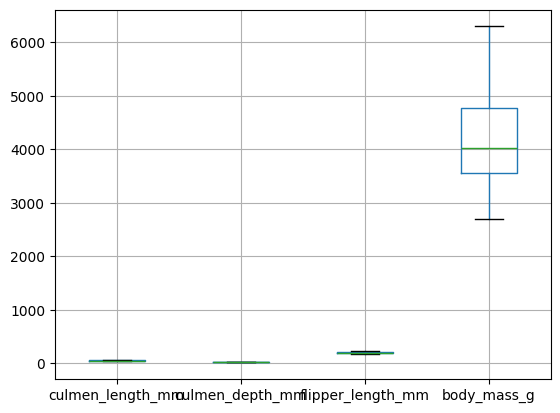

In [6]:
#finding outliers
data.boxplot()
plt.show()

- It would appear there are no outliers in our data
- Lower bound = Q1 - 1.5 * iqr
- Upper bound = Q3 + 1.5 * iqr

<h4>One hot encoding</h4>

- Encoding the `sex` column into binary format

In [7]:
data.columns


Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [8]:
data = pd.get_dummies(data, dtype=int)

In [9]:
data.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex_FEMALE             int64
sex_MALE               int64
dtype: object

In [10]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1


<h4>Preprocessing data for PCA</h4>

- The data will now be normalised so that it can be put through principal component analysis which will help us select how many features to use.

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(data)
penguins_preprocessed = pd.DataFrame(data=X,columns=data.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994
5,-0.940642,0.330548,-1.425342,-0.722199,1.006042,-1.006042
6,-0.885538,1.250172,-0.426399,0.581912,-0.993994,0.993994
7,-0.536545,0.228367,-1.353989,-1.250054,1.006042,-1.006042
8,-0.995746,2.067616,-0.711811,-0.504847,-0.993994,0.993994
9,-1.363106,0.330548,-1.139930,-0.629049,1.006042,-1.006042


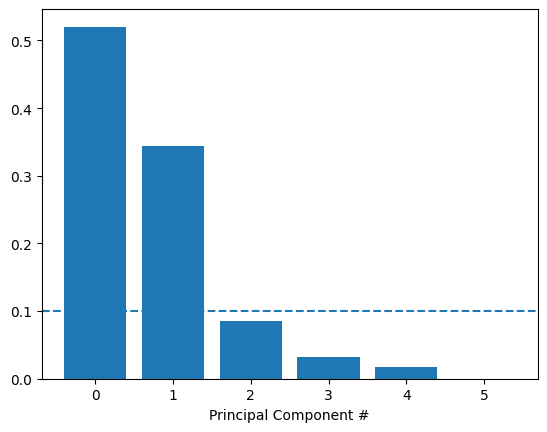

In [12]:
#Perfoming PCA
%matplotlib inline
pca = PCA()
pca.fit(penguins_preprocessed)
exp_variance = pca.explained_variance_ratio_

#plotting explained variance
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel("Principal Component #")
ax.axhline(y=0.1, linestyle="--")

- We can see a steep drop off in explained variance after two components (remember index starts at 0) in this elbow plot so we know only two features should be used to minimise overfitting in our model.

- Now that we know the correct number of features, we can re-run our PCA with this knowledge in mind.



In [13]:
#Graph shows only features 0 and 1 are above 10%
#Running PCA with only these features
n_components = 2
pca = PCA(n_components=n_components, random_state=42)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

- Finding optimum number of clusters

By plotting another elbow graph we can see the optimum number of clusters to use. Inertia here is a measure of how well a dataset is clustered by the K-Means algorithm, we want a low inertia and a low number with few clusters so that we are explaining the differences in data while not overfitting.

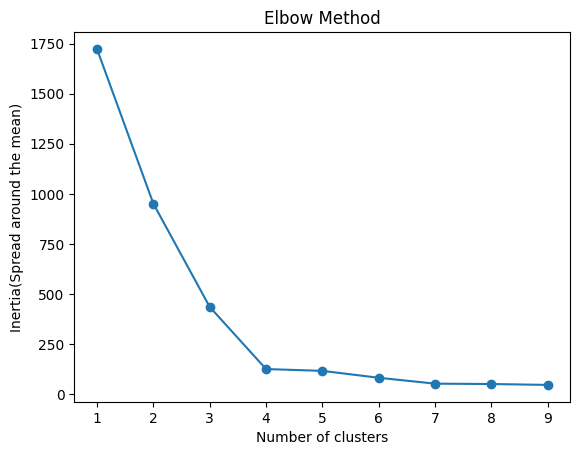

In [14]:
#Finding optimum number of clusters

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia(Spread around the mean)")
plt.title('Elbow Method')
plt.show()

- Our elbow plot shows that after 4 clusters inertia has plateaud, this suggests 4 is the optimum number of clusters to use.

<h4>Running K-Means cluster algorithm</h4>

- Knowing the correct number of features and clusters we are ready to run the K-Means algorithm on our data and find the clusters of pengui

/tmp/ipykernel_3320/2708390907.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


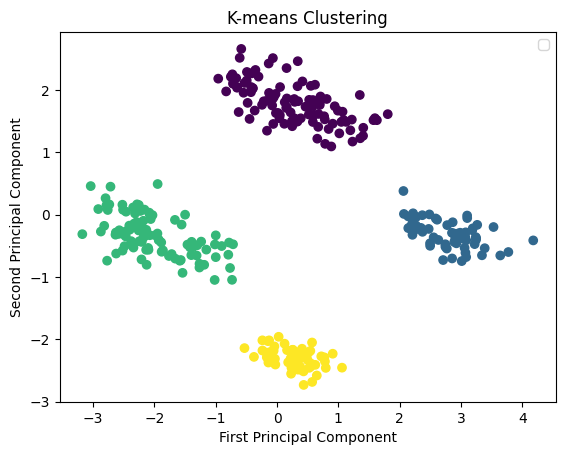

In [18]:

kmeans = KMeans(n_clusters = 4, random_state=42).fit(penguins_PCA)

plt.scatter(penguins_PCA[:,0], penguins_PCA[:,1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means Clustering')
plt.legend()
plt.show()

- We can see 4 main groups of clusters here, they are well separated into distinct groups on this chart.

To summarise the penguin species by each cluster we can create a dataframe which shows the mean of each value.



In [21]:
# Step - create final `stat_penguins` DataFrame
data['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
                  'label']
stat_penguins = data[numeric_columns].groupby('label').mean()
stat_penguins


,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,49.473770,15.718033,221.540984
2,40.217757,17.611215,189.046729
3,45.563793,14.237931,212.706897


- This dataframe shows the average measurements of each penguin species based on the cluster they fell into.
- Sadly these figures can only be interpreted by a penguin professional